In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy import stats
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn_pandas import DataFrameMapper

In [2]:
df = pd.read_csv('../data/regression/Real estate.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [4]:
df.head()

No  X1 transaction date  X2 house age  \
0   1             2012.917          32.0   
1   2             2012.917          19.5   
2   3             2013.583          13.3   
3   4             2013.500          13.3   
4   5             2012.833           5.0   

   X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                84.87882                               10   
1                               306.59470                                9   
2                               561.98450                                5   
3                               561.98450                                5   
4                               390.56840                                5   

   X5 latitude  X6 longitude  Y house price of unit area  
0     24.98298     121.54024                        37.9  
1     24.98034     121.53951                        42.2  
2     24.98746     121.54391                        47.3  
3     24.98746     121.54391                        54.8  
4     24.97937     121.54245                        43.1

In [5]:
df.drop('No', inplace=True, axis=1)

<AxesSubplot:>

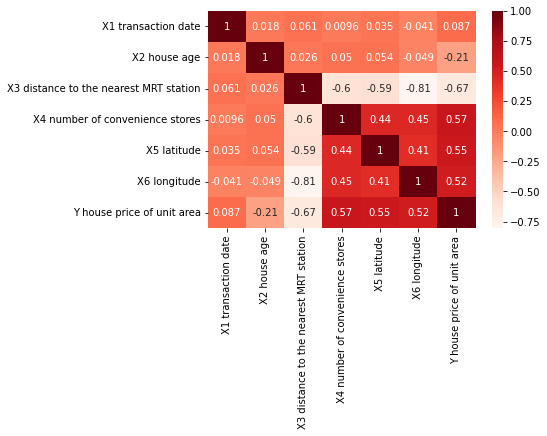

In [6]:
sns.heatmap(df.corr(), annot=True,cmap='Reds')

In [7]:
df.drop('X1 transaction date', axis=1, inplace=True)

In [8]:
X = df.drop('Y house price of unit area', axis=1)
y = df['Y house price of unit area']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

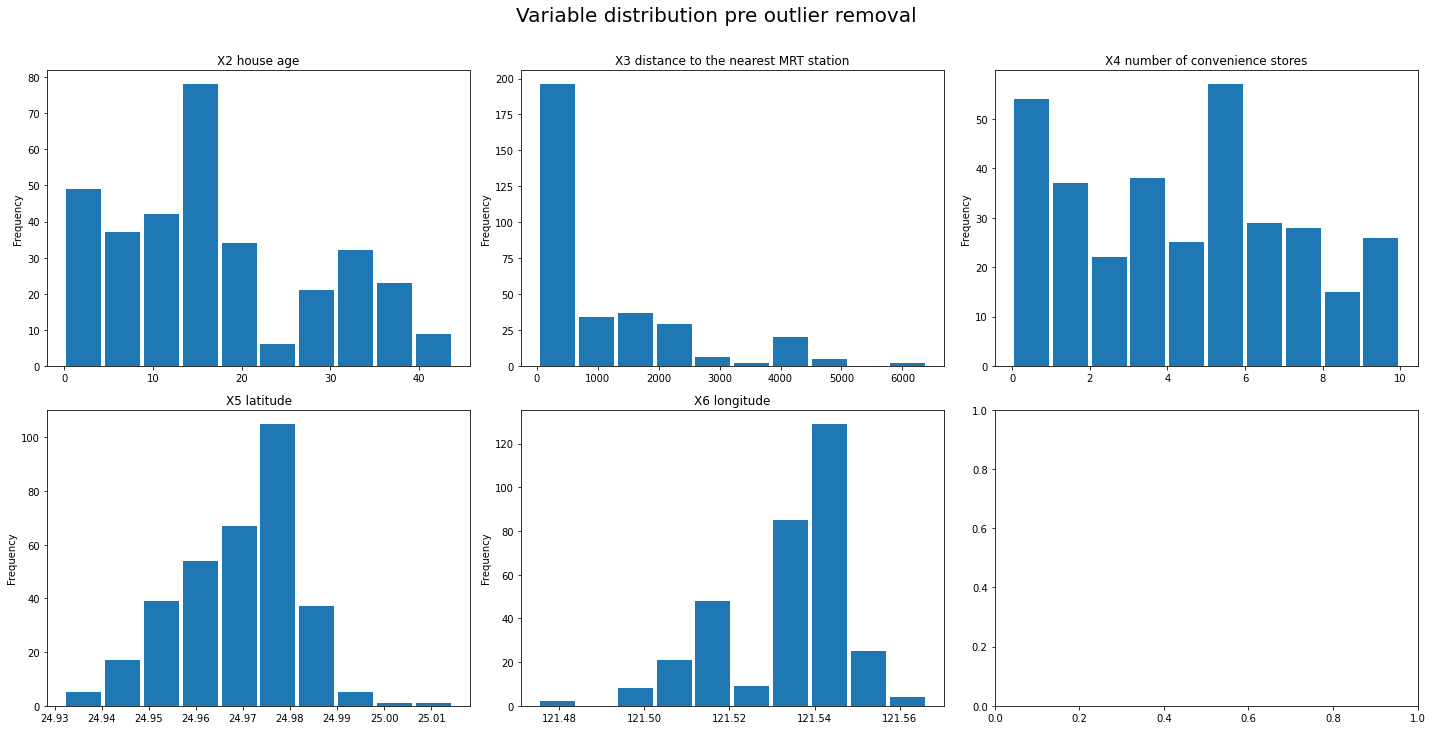

In [9]:
fig, axs = plt.subplots(ncols=3, nrows=2 , figsize= (20,10))
fig.suptitle('Variable distribution pre outlier removal', y=1.01, fontsize=20)
for col, ax in zip(X_train.iloc[: , 0:30], axs.ravel()):
    X_train[col].plot(kind='hist', ax=ax, title=col, rwidth=0.9)

plt.tight_layout()
plt.savefig('Variable distribution pre outlier removal.jpg', dpi=300, bbox_inches='tight')

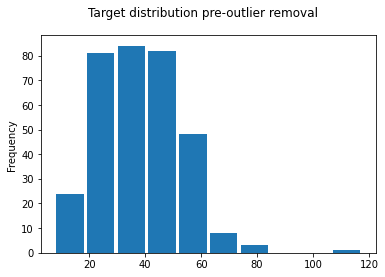

In [10]:
y_train.plot(kind='hist', rwidth=0.9)
plt.suptitle('Target distribution pre-outlier removal')
plt.savefig('Target distribution pre-outlier removal.jpg', dpi=300, bbox_inches='tight')

In [11]:
X_train['class'] = y_train
X_train

X2 house age  X3 distance to the nearest MRT station  \
13           20.4                              2469.64500   
181          11.6                               201.89390   
154          16.9                              4066.58700   
109           4.0                              2147.37600   
32           37.9                               488.57270   
..            ...                                     ...   
63            2.6                               533.47620   
326           4.1                                56.47425   
337          31.3                               600.86040   
11            6.3                                90.45606   
351           4.0                              2180.24500   

     X4 number of convenience stores  X5 latitude  X6 longitude  class  
13                                 4     24.96108     121.51046   23.8  
181                                8     24.98489     121.54121   55.9  
154                                0     24.94297     121.50342   20.7  
109                                3     24.96299     121.51284   28.4  
32                                 1     24.97349     121.53451   34.2  
..                               ...          ...           ...    ...  
63                                 4     24.97445     121.54765   55.0  
326                                7     24.95744     121.53711   62.1  
337                                5     24.96871     121.54651   30.9  
11                                 9     24.97433     121.54310   58.1  
351                                3     24.96324     121.51241   28.6  

[331 rows x 6 columns]

In [12]:
X_train = X_train[(np.abs(stats.zscore(X_train)) < 3).all(axis=1)]
y_train = X_train['class']
X_train.drop('class', axis=1, inplace=True)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


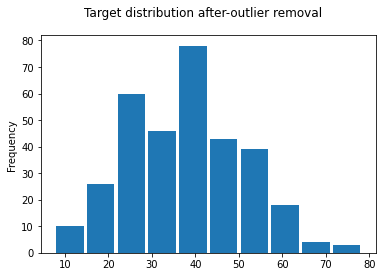

In [13]:
y_train.plot(kind='hist', rwidth=0.9)
plt.suptitle('Target distribution after-outlier removal')
plt.savefig('Target distribution after-outlier removal.jpg', dpi=300, bbox_inches='tight')

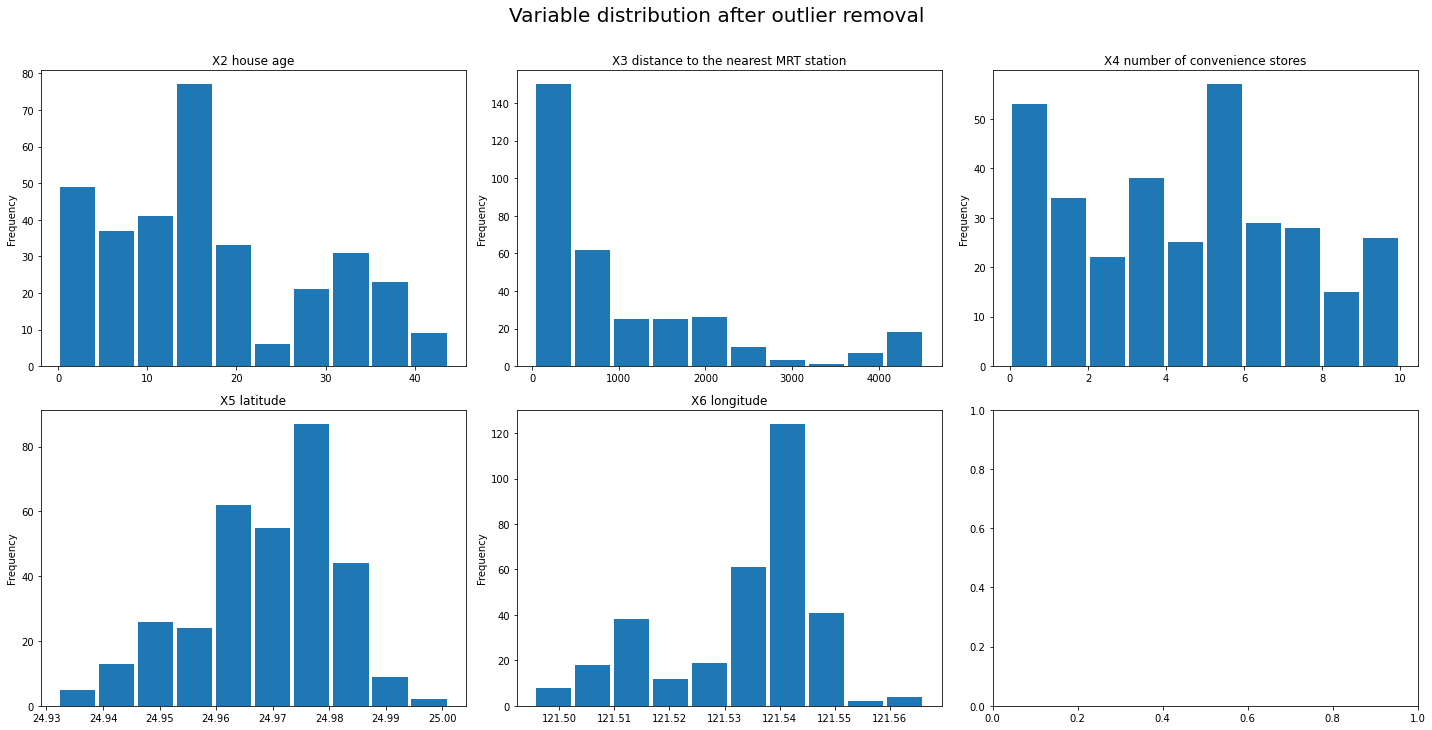

In [14]:
fig, axs = plt.subplots(ncols=3, nrows=2 , figsize= (20,10))
fig.suptitle('Variable distribution after outlier removal', y=1.01, fontsize=20)
for col, ax in zip(X_train.iloc[: , 0:30], axs.ravel()):
    X_train[col].plot(kind='hist', ax=ax, title=col, rwidth=0.9)

plt.tight_layout()
plt.savefig('Variable distribution after outlier removal.jpg', dpi=300, bbox_inches='tight')

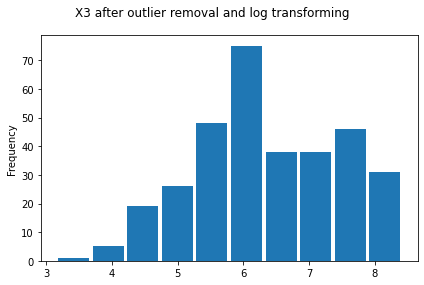

In [15]:
np.log(X_train['X3 distance to the nearest MRT station']).plot(kind='hist', rwidth=0.9)
plt.suptitle('X3 after outlier removal and log transforming')
plt.tight_layout()
plt.savefig('X3 after outlier removal and log transforming.jpg', dpi=300, bbox_inches='tight')

In [16]:
X_train['X3 distance to the nearest MRT station'] = np.log(X_train['X3 distance to the nearest MRT station'])
X_test['X3 distance to the nearest MRT station'] = np.log(X_test['X3 distance to the nearest MRT station'])

/var/folders/q2/wz31b41120l4chrx6_0zn1ym0000gn/T/ipykernel_4737/3777716928.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['X3 distance to the nearest MRT station'] = np.log(X_train['X3 distance to the nearest MRT station'])


In [17]:
X_train.shape

(327, 5)

In [18]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

mapper = DataFrameMapper([(X_train.columns, StandardScaler())])
scaled_features = mapper.fit_transform(X_train.copy())
scaled_features_1 = mapper.transform(X_test.copy())
scaled_features_train = pd.DataFrame(scaled_features, index=X_train.index, columns=X_train.columns)
scaled_features_test = pd.DataFrame(scaled_features_1, index=X_test.index, columns=X_train.columns)

In [20]:
X_train

X2 house age  X3 distance to the nearest MRT station  \
13           20.4                                7.811830   
181          11.6                                5.307742   
154          16.9                                8.310559   
109           4.0                                7.672002   
32           37.9                                6.191488   
..            ...                                     ...   
63            2.6                                6.279414   
326           4.1                                4.033785   
337          31.3                                6.398363   
11            6.3                                4.504864   
351           4.0                                7.687193   

     X4 number of convenience stores  X5 latitude  X6 longitude  
13                                 4     24.96108     121.51046  
181                                8     24.98489     121.54121  
154                                0     24.94297     121.50342  
109                                3     24.96299     121.51284  
32                                 1     24.97349     121.53451  
..                               ...          ...           ...  
63                                 4     24.97445     121.54765  
326                                7     24.95744     121.53711  
337                                5     24.96871     121.54651  
11                                 9     24.97433     121.54310  
351                                3     24.96324     121.51241  

[327 rows x 5 columns]

In [21]:
scaled_features_train['target'] = y_train
scaled_features_test['target'] = y_test
scaled_features_train.to_csv('../data/regression/Real estate train.csv') 
scaled_features_test.to_csv('../data/regression/Real estate test.csv') 